In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
import datetime as dt
import importlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.dates as mdates

import aux_funcs as aux

# Import

In [31]:
importlib.reload(aux)

<module 'aux_funcs' from 'C:\\rob\\Kaggle\\ASHRAE\\aux_funcs.py'>

In [2]:
train_df = aux.read_train_data()

train.csv read in 15.9 s
Mem. usage decreased to 289.19 Mb (53.1% reduction)
(20216100, 11)
   building_id  meter  timestamp  meter_reading  hour  day  year  weeknumber  \
0            0      0 2016-01-01            0.0     0    1  2016          53   
1            1      0 2016-01-01            0.0     0    1  2016          53   
2            2      0 2016-01-01            0.0     0    1  2016          53   
3            3      0 2016-01-01            0.0     0    1  2016          53   
4            4      0 2016-01-01            0.0     0    1  2016          53   

   weekday  month  log_meter_reading  
0        4      1                0.0  
1        4      1                0.0  
2        4      1                0.0  
3        4      1                0.0  
4        4      1                0.0  


In [3]:
test_df = aux.read_test_data()

test.csv read in 36.7 s
Mem. usage decreased to 596.49 Mb (53.1% reduction)
(41697600, 10)
   row_id  building_id  meter  timestamp  hour  day  year  weeknumber  \
0       0            0      0 2017-01-01     0    1  2017          52   
1       1            1      0 2017-01-01     0    1  2017          52   
2       2            2      0 2017-01-01     0    1  2017          52   
3       3            3      0 2017-01-01     0    1  2017          52   
4       4            4      0 2017-01-01     0    1  2017          52   

   weekday  month  
0        6      1  
1        6      1  
2        6      1  
3        6      1  
4        6      1  


In [4]:
pred = aux.read_file('submission_03_191028.csv')

submission_03_191028.csv read in 67.0 s
Mem. usage decreased to 318.13 Mb (50.0% reduction)


In [6]:
pred.isnull().sum()

row_id           0
meter_reading    0
dtype: int64

In [7]:
test_df = test_df.join(pred, on='row_id',rsuffix='r')
test_df.drop(columns=['row_idr'],inplace=True)
test_df.head()

,row_id,building_id,meter,timestamp,hour,day,year,weeknumber,weekday,month,meter_reading
0,0,0,0,2017-01-01,0,1,2017,52,6,1,195.518845
1,1,1,0,2017-01-01,0,1,2017,52,6,1,62.353161
2,2,2,0,2017-01-01,0,1,2017,52,6,1,5.502503
3,3,3,0,2017-01-01,0,1,2017,52,6,1,171.527237
4,4,4,0,2017-01-01,0,1,2017,52,6,1,1131.174805


In [21]:
bid = 1033
btrain = train_df.loc[train_df['building_id']==bid]

#print(btrain.head())
btest = test_df.loc[test_df['building_id']==bid]
btest = btest.sort_values(by='timestamp')
#btest.head()

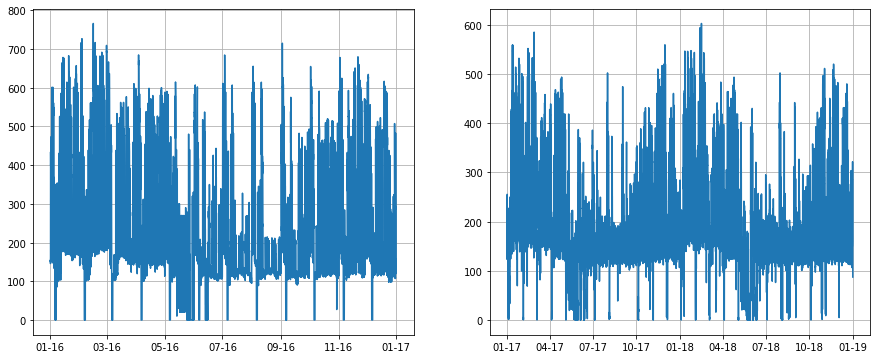

In [22]:
fig=plt.figure(figsize=(15,6))

date_format = '%m-%y'
ax1=plt.subplot(121)
ax1.plot(btrain['timestamp'],btrain['meter_reading'])
ax1.xaxis.set_major_formatter(mdates.DateFormatter(date_format))
plt.grid()

ax2=plt.subplot(122)
ax2.plot(btest['timestamp'],btest['meter_reading'])
ax2.xaxis.set_major_formatter(mdates.DateFormatter(date_format))
plt.grid()


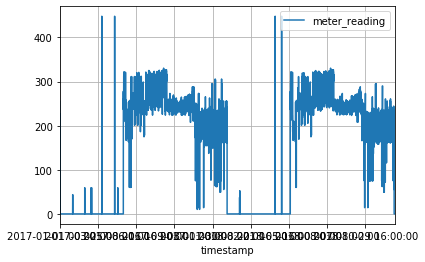

In [13]:
btest.plot(x='timestamp',y='meter_reading')
plt.grid()